# Testes de hipóteses para a média (multidimensional)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(123)

In [6]:
df = pd.read_csv('banco.csv', decimal='.', sep=',', index_col=0)
df.head()

,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor
ID,,,,,,,,,
1,0,26,0,0,"2471,51","0,00","0,00","0,00","0,00"
2,1,25,1,1,"2781,90","4172,85","2781,90","0,00","0,00"
3,0,29,0,0,"2567,38","0,00","0,00","0,00","0,00"
4,1,29,1,0,"3329,50","4994,24","0,00","0,00","0,00"
5,1,19,0,1,"2074,08","0,00","2074,08","1,00","5887,33"


In [7]:
from scipy.stats import f

In [8]:
def T2Hotelling(df, mu0, n, p):
    Xbarra=df.mean()
    S = df.cov()
    S_inv = np.linalg.inv(S)
    T2Hotelling = n*np.array(Xbarra-mu0).T.dot(S_inv).dot(np.array(Xbarra-mu0))
    qf = f.ppf(0.95, p , n-p, loc=0, scale=1)
    teste = T2Hotelling > (n-1) * p / (n-p) * qf
    pvalor = 1-f.cdf(T2Hotelling/((n-1) * p / (n-p) ), p, n-p)
    print('Rejeitamos H0') if teste else print('Não rejeitamos H0')
    print('Valor da estatística', T2Hotelling)
    print('valor p', pvalor)

In [9]:
df_amostra = df.sample(100)

In [10]:
mu0 = [0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150]
n=len(df_amostra)
p=len(df_amostra.columns)

T2Hotelling(df_amostra, mu0, n, p)

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\187289474.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xbarra=df.mean()
C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\187289474.py:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = df.cov()


ValueError: operands could not be broadcast together with shapes (4,) (9,) 

In [11]:
df_amostra.mean()

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\117977116.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_amostra.mean()


Sexo                0.36
Idade              29.37
CartaodeCredito     0.48
ChequeEspecial      0.38
dtype: float64

### Região de confiança

In [12]:
Xbarra = df_amostra.mean()
mu0 = [0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150]
S_inv = np.linalg.inv(df_amostra.cov())
n = len(df_amostra)

Teste = n*np.array(Xbarra-mu0).T.dot(S_inv).dot(np.array(Xbarra-mu0)) < (n-1) * p / (n-p) * f.ppf(0.95, p , n-p, loc=0, scale=1)

print('Resultado: mu0 está na região de confiança de mu') if(Teste) else print('Resultado: mu0 não está na região de confiança de mu')

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\396210569.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xbarra = df_amostra.mean()
C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\396210569.py:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S_inv = np.linalg.inv(df_amostra.cov())


ValueError: operands could not be broadcast together with shapes (4,) (9,) 

# Testes de hipóteses para a comparação de médias em amostras independentes

### Medias amostrais

In [13]:
df_amostra[df_amostra['Sexo']==0].mean()

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\1011488418.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_amostra[df_amostra['Sexo']==0].mean()


Sexo                0.000000
Idade              29.265625
CartaodeCredito     0.375000
ChequeEspecial      0.156250
dtype: float64

In [14]:
df_amostra[df_amostra['Sexo']==1].mean()

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\4209466358.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_amostra[df_amostra['Sexo']==1].mean()


Sexo                1.000000
Idade              29.555556
CartaodeCredito     0.666667
ChequeEspecial      0.777778
dtype: float64

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\897914108.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat =  df_amostra.corr()


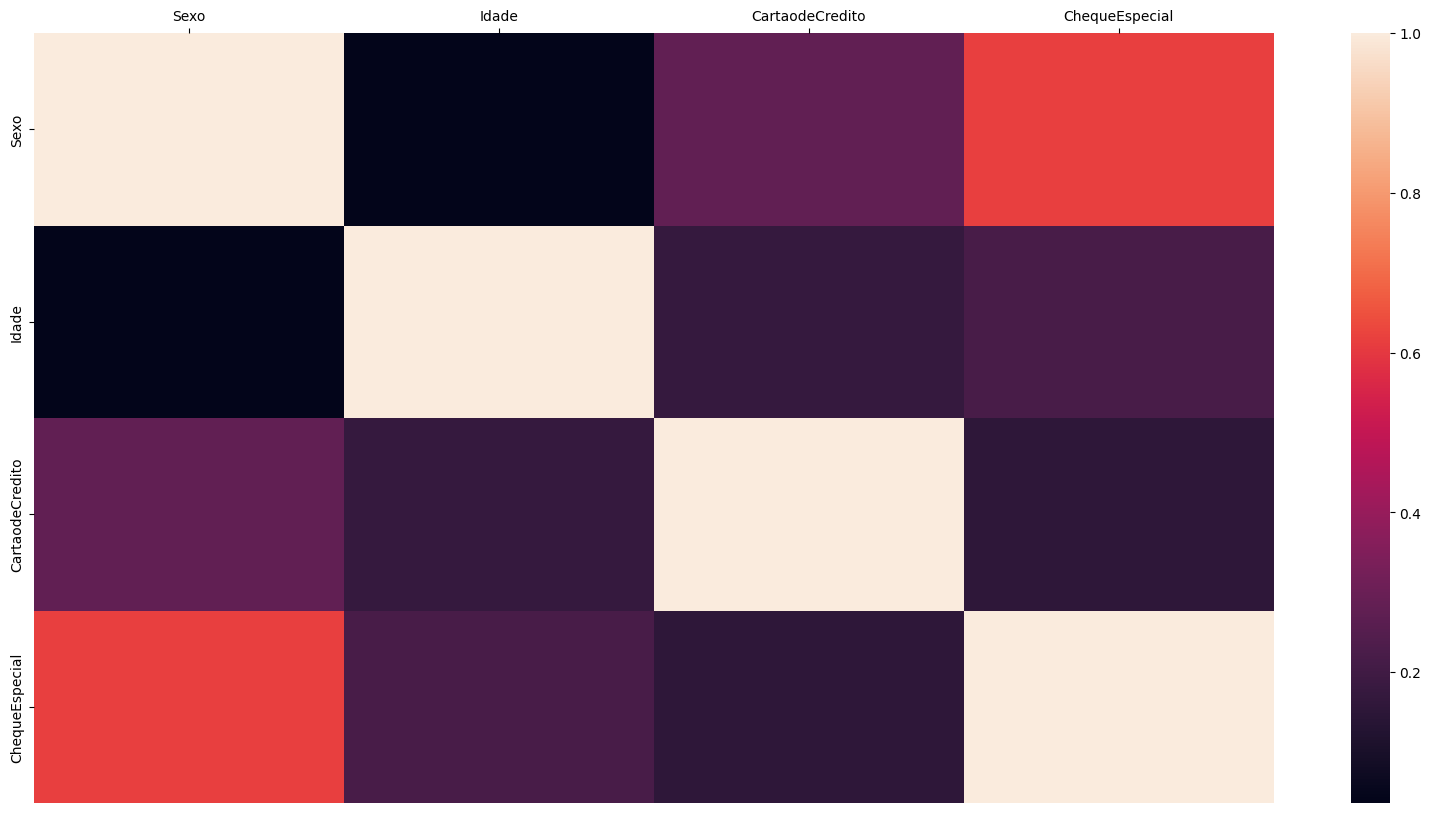

In [15]:
import seaborn as sns

corrmat =  df_amostra.corr()
corrmat

fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [16]:
# Dados mulheres

S1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1].cov()
n1 = len(df_amostra[df_amostra['Sexo']==1])
Xbarra1 = df_amostra[df_amostra['Sexo']==1].mean()
S1

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\452854788.py:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1].cov()
C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\452854788.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xbarra1 = df_amostra[df_amostra['Sexo']==1].mean()


,Idade,CartaodeCredito,ChequeEspecial
Idade,14.768254,0.647619,0.526984
CartaodeCredito,0.647619,0.228571,0.009524
ChequeEspecial,0.526984,0.009524,0.177778


In [17]:
n1

36

In [18]:
# Dados homens

S2 = df.iloc[:,1:8][df['Sexo']==0].cov()
n2 = len(df_amostra[df_amostra['Sexo']==0])
Xbarra2 = df_amostra[df_amostra['Sexo']==0].mean()
S2

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\254737615.py:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S2 = df.iloc[:,1:8][df['Sexo']==0].cov()
C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\254737615.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xbarra2 = df_amostra[df_amostra['Sexo']==0].mean()


,Idade,CartaodeCredito,ChequeEspecial
Idade,15.503126,-0.024716,0.028504
CartaodeCredito,-0.024716,0.238668,0.003039
ChequeEspecial,0.028504,0.003039,0.150218


In [19]:
n2

64

In [20]:
S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)
S_pooled

,Idade,CartaodeCredito,ChequeEspecial
Idade,15.240671,0.215404,0.206533
CartaodeCredito,0.215404,0.235062,0.005355
ChequeEspecial,0.206533,0.005355,0.160061


In [21]:
def T2Hotelling_duas_amostras(df1, df2, delta0):
    n1 = len(df1)
    n2 = len(df2)
    p = len(df1.columns)
    Xbarra1=df1.mean()
    Xbarra2=df2.mean()
    S1 = df1.cov()
    S2 = df2.cov()
    S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)
    S_pooled_inv = np.linalg.inv(S_pooled)
    
    T2Hotelling_duas_amostras = np.array(Xbarra1-Xbarra2-delta0).T.dot(S_pooled_inv).dot(np.array(Xbarra1-Xbarra2-delta0)) / (n1+n2-2)
    qf = f.ppf(0.95, p , (n1+n2-2), loc=0, scale=1)
    teste = T2Hotelling_duas_amostras > (n1+n2-2) * p / (n1+n2-p-1) * qf
    pvalor = 1-f.cdf(T2Hotelling_duas_amostras/((n1+n2-2) * p / (n1+n2-p-1) ), p, (n1+n2-2))
    print('Rejeitamos H0') if teste else print('Não rejeitamos H0')
    print('Valor da estatística', T2Hotelling_duas_amostras)
    print('valor p', pvalor)

In [22]:
df1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1]
df2 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==0]

delta0 = [0,0,0,0,0,0,0]

T2Hotelling_duas_amostras(df1,df2,delta0)

C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\2987124760.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xbarra1=df1.mean()
C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\2987124760.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xbarra2=df2.mean()
C:\Users\gabriel.marchesi\AppData\Local\Temp\ipykernel_8856\2987124760.py:7: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value 

ValueError: operands could not be broadcast together with shapes (3,) (7,) 

# Testes de hipóteses para a comparação de médias em amostras correlacionadas

### Amostras pareadas

In [23]:
mean = [0, 0, 0]
mean1 = [1, 0, 0]

cov1 = [[2,1,0],[1,3,1],[0,1,4]]  
cov2 = [[0.01,0,0],[0,0.01,0],[0,0,0.01]]

X1 = np.random.multivariate_normal(mean, cov1, 50)
X2 = X1 + np.random.multivariate_normal(mean1, cov2, 50)

In [24]:
X = np.concatenate((X1,X2), axis=1)
X.shape

(50, 6)

In [25]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5
0,1.504210,3.311138,-1.885922,2.455815,3.408272,-1.869426
1,-0.902103,-2.899060,-3.008861,0.148516,-2.868599,-2.835773
2,2.081271,2.641931,0.614202,3.021029,2.817814,0.574508
3,-2.338916,0.311498,3.254688,-1.304477,0.432647,3.197360
4,1.579830,1.349937,-1.061389,2.603910,1.527428,-0.965135


In [26]:
df.mean()

0   -0.170576
1    0.078559
2   -0.105890
3    0.811273
4    0.085821
5   -0.102832
dtype: float64

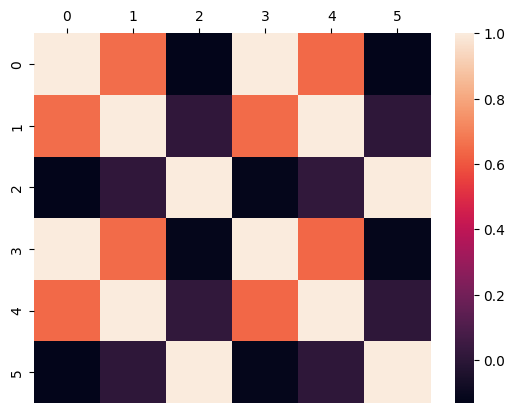

In [27]:
corrmat =  df.corr()
corrmat

sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [28]:
df_diff =  pd.DataFrame((X1-X2))

In [29]:
df_diff.head()

,0,1,2
0,-0.951605,-0.097134,-0.016496
1,-1.050618,-0.030461,-0.173089
2,-0.939759,-0.175883,0.039694
3,-1.034439,-0.121149,0.057329
4,-1.024080,-0.177492,-0.096254


In [30]:
mu0=[0,0,0]
n=len(df_diff)
p=len(df_diff.columns)
T2Hotelling(df_diff, mu0, n, p)

Rejeitamos H0
Valor da estatística 4368.151021217475
valor p 1.1102230246251565e-16
